# 2- Analisis exploratorio y preprocesamiento

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:

news = pd.read_csv('news_marzo_todas_20200331-203750.csv')
news

,news_paper,category,link,date,title,abstract,author,key_words,body
0,clarin,deportes,https://www.clarin.com//deportes/velez-sarsfie...,2020-03-04,"Vélez Sarsfield vs Godoy Cruz, en vivo por la ...",El Fortín busca afianzarse en el tercer lugar ...,[],Superliga ArgentinaClub Atlético Vélez Sarsfie...,Vélez Sarsfield recibe a Godoy Cruz de Mendoza...
1,clarin,deportes,https://www.clarin.com//deportes/zielinski-cam...,2020-03-04,Cómo se prepara Atlético Tucumán para frenar a...,El “Ruso” Zielinski analiza variantes en su on...,[],Atlético TucumánRiver PlateSuperliga Argentina,Atlético Tucumán no quiere ser espectador de l...
2,clarin,deportes,https://www.clarin.com//deportes/liga-de-quito...,2020-03-04,"Liga de Quito vs River, en vivo por Copa Liber...",El equipo argentino afronta el debut en la Cop...,[],Copa LibertadoresRiver PlateMarcelo GallardoLi...,"River Plate visita a Liga de Quito, en uno de ..."
3,clarin,deportes,https://www.clarin.com//deportes/ponzio-quito-...,2020-03-04,"Ponzio, en Quito: “Hay que aprovechar nuestras...","El capitán, que será titular ante Liga, remarc...",Maximiliano Uria,River PlateLeonardo PonzioCopa Libertadores,Celebrará de una manera especial Leonardo Ponz...
4,clarin,deportes,https://www.clarin.com//deportes/neymar-barcel...,2020-03-04,La carta que jugará Neymar para irse del PSG y...,Como el brasileño no tiene fijada una cifra de...,[],NeymarFC BarcelonaParis Saint Germain,La relación entre Neymar y el PSG<U+200B> camb...
...,...,...,...,...,...,...,...,...,...
21902,lanacion,politica,http://www.lanacion.com.ar//politica/las-princ...,2020-03-31,Coronavirus en la Argentina: las principales f...,NaN,NaN,NaN,El presidente \r\n\r\nAlberto Fernández\r\n\r\...
21903,lanacion,politica,http://www.lanacion.com.ar//politica/coronavir...,2020-03-31,Coronavirus: la Justicia rechazó la mayoría de...,NaN,Candela Ini,NaN,La \r\n\r\njurisprudencia \r\n\r\nsobre el \r\...
21904,lanacion,politica,http://www.lanacion.com.ar//politica/conurbano...,2020-03-31,Coronavirus: Una travesía por los bloqueos dur...,NaN,Javier Fuego Simondet,NaN,Con una enorme bolsa blanca y en medio de un n...
21905,lanacion,politica,http://www.lanacion.com.ar//politica/coronavir...,2020-03-31,Coronavirus: ¿Cómo y cuándo salir de la cuaren...,NaN,"['Eduardo Levy Yeyati', 'Andrés Malamud']",NaN,"La pandemia es una crisis global, pero las res..."


---

Estadísticas descriptivas del dataset

---

In [10]:
news.describe()

,news_paper,category,link,date,title,abstract,author,key_words,body
count,21907,21907,21907,21907,21907,13412,17593,4583,21856
unique,3,5,7351,28,7636,4999,519,1739,8187
top,lanacion,deportes,http://www.lanacion.com.ar//sociedad/coronavir...,2020-03-11,Agenda Vida Digital,Se trata de los nuevos productos que dio a con...,[],Coronavirus,"Cada año, las compañías de teléfonos móviles e..."
freq,8686,5259,56,1167,53,34,9399,250,34


---

**Selección, limpieza y transformación**


---



---

El script de descarga de noticias se ejecuta 3 veces durante un día, por lo que algunas noticias que no se modifican pueden aparecer 3 veces en un mismo día.
En algunas ocasiones el diario actualiza el texto de alguna noticia durante el día, por lo que se puede observar que se mantiene el título pero se modifica el body de alguna noticia.

A continuación se presenta una tabla en la que se puede visualizar que la longitud del campo body de la noticia con ID = 7574, 7625, 7639 ha cambiado durante el día.

Para este trabajo se decidió no eliminar noticias duplicadas.

---


In [11]:
news[['title','body']].describe()

,title,body
count,21907,21856
unique,7636,8187
top,Agenda Vida Digital,"Cada año, las compañías de teléfonos móviles e..."
freq,53,34


---

... se eliminan los registros cuyos title o body son NA

---

In [12]:
news_clean = news.dropna(subset=['title','body'])
news_clean.describe()

,news_paper,category,link,date,title,abstract,author,key_words,body
count,21856,21856,21856,21856,21856,13387,17557,4577,21856
unique,3,5,7334,28,7618,4991,518,1738,8187
top,lanacion,deportes,http://www.lanacion.com.ar//sociedad/coronavir...,2020-03-11,Agenda Vida Digital,Se trata de los nuevos productos que dio a con...,[],Coronavirus,"Cada año, las compañías de teléfonos móviles e..."
freq,8641,5247,56,1167,53,34,9387,250,34


---

Cantidades de noticias agrupadas por diarios (marzo 2020)

---

In [13]:
import numpy as np

# Convierte el atributo news.news_paper como category
c = news_clean.news_paper
diarios = c.astype('category').dtype
diarios.categories

# Agrupa las noticias por diario y categoría
a = news_clean.groupby(['news_paper'])

# Genera un array numpay solo con la cantidad de noticias
b = np.array(a.aggregate(np.count_nonzero)['link'])

# Genera un dataframe con la cantidad de noticias por diario 
resumen = pd.DataFrame({"Diario":diarios.categories, 
                       "Cantidad":b})
resumen

,Diario,Cantidad
0,clarin,4577
1,infobae,8638
2,lanacion,8641


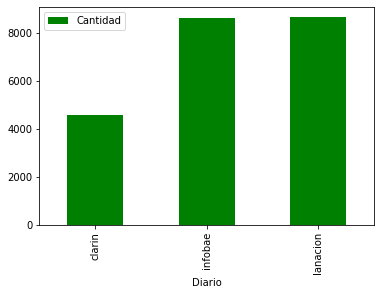

In [14]:
resumen.plot.bar(x='Diario',y='Cantidad', color='g');


---

Cantidades de noticias agrupadas por secciones (marzo 2020)

---


In [15]:

# Convierte el atributo news.category como category
d = news_clean.category
secciones = d.astype('category').dtype
secciones.categories

# Agrupa las noticias por diario y categoría
e = news_clean.groupby(['category'])

# Genera un array numpay solo con la cantidad de noticias
f = np.array(e.aggregate(np.count_nonzero)['link'])

# Genera un dataframe con la cantidad de noticias por diario 
resumenSecciones = pd.DataFrame({"Sección":secciones.categories, 
                                 "Cantidad":f})
resumenSecciones

,Sección,Cantidad
0,deportes,5247
1,economia,2934
2,politica,4122
3,sociedad,4556
4,tecnologia,4997


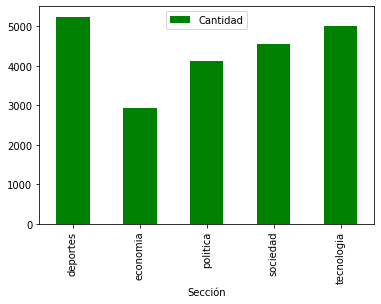

In [16]:
resumenSecciones.plot.bar(x='Sección',y='Cantidad', color='g');

In [17]:
import matplotlib.pyplot as plt

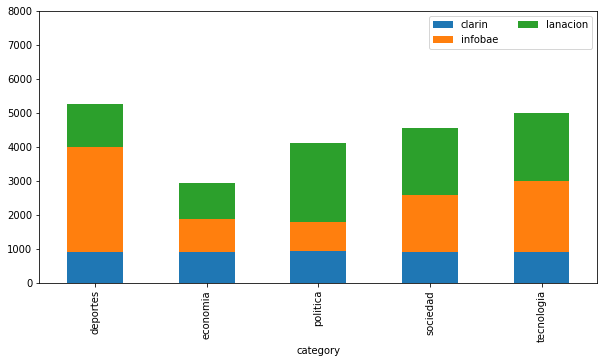

In [20]:

z = news_clean.groupby(['news_paper', 'category'] )['category'].count().unstack('news_paper')
z.plot.bar(stacked=True, figsize = (10, 5))
plt.legend(loc='best', ncol=2)
plt.ylim(0,8000);


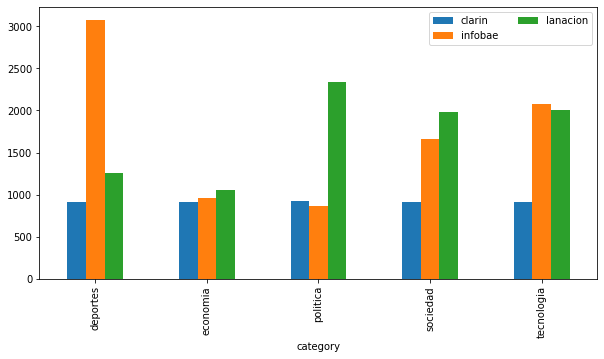

In [21]:
z.plot.bar(figsize = (10, 5))
plt.legend(loc='best', ncol=2);

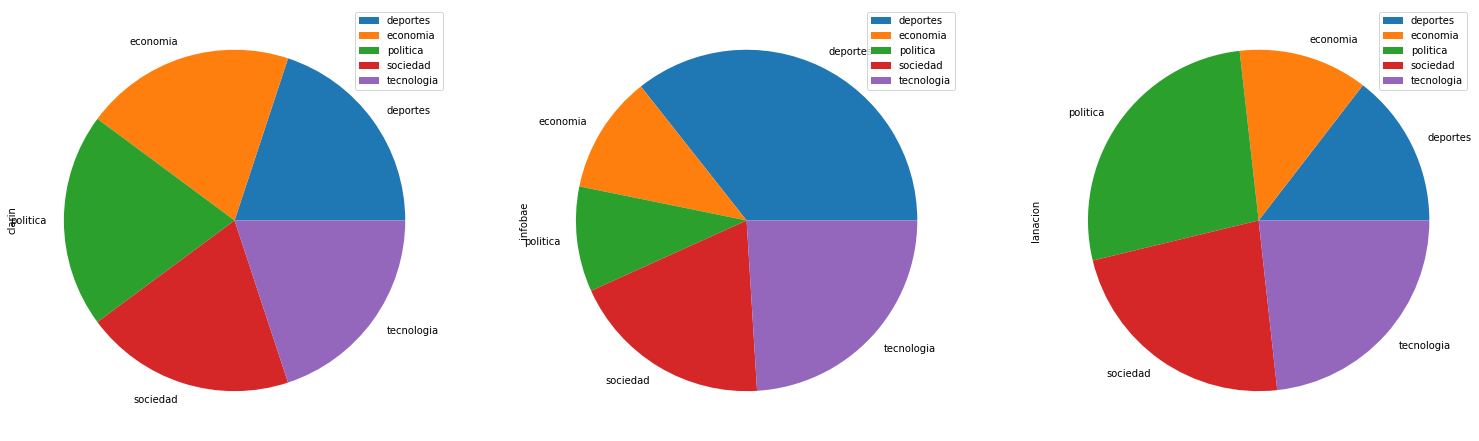

In [27]:
z = news_clean.groupby(['news_paper', 'category'] )['category'].count().unstack('news_paper')
z.plot.pie( subplots=True,figsize=(26, 20));
# hay que sacar la leyenda de cada seccion y poner el % dentro del chart


---

**Construcción de nuevos festures**

Se genera el feature *titleandbody* a partir de la concatenación de los features del dataset original *title* y *body*, ya que las cadenas que aparecen en dichos features son las que interesan en este trabajo.

---

In [28]:
news = news_clean[['news_paper','category','date']]
news['titleandbody'] = news_clean['title'].str.cat(news_clean['body'], sep =' // ')

C:\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
news.sample(5)

,news_paper,category,date,titleandbody
18880,lanacion,tecnologia,2020-03-22,Nokia presentó su nueva línea de teléfonos con...
16740,lanacion,sociedad,2020-03-19,Coronavirus: el médico argentino que trabaja e...
21209,lanacion,politica,2020-03-23,"Coronavirus. ""La Argentina va a cerrar, en un ..."
8583,infobae,economia,2020-03-30,ARBA suspendió los embargos a las pymes hasta ...
10047,infobae,sociedad,2020-03-28,En medio de la cuarentena total por el coronav...


In [30]:
TMnews = news.to_csv (r'C:/Users/user/UTN - Breaking News/marzo_news.csv', index = None, header=True) 